<a href="https://colab.research.google.com/github/matsunori39/Approaching-Almost-Any-Machine-Learning-Problem/blob/main/Approaching_(Almost)_Any_Machine_Learning_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第1章 教師あり学習と教師なし学習

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [ ]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [ ]:
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [ ]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)

grid.map(plt.scatter, "x", "y").add_legend()

# 第2章 交差検証

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [ ]:
import pandas as pd
# df = pd.read_csv("winequality-red.csv")
df = pd.read_csv("winequality-red.csv", sep=';')

In [ ]:
df

In [ ]:
sorted(df.quality.unique())

In [ ]:
# 品質値の対応表となる辞書
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# pandasのmapを用いることで、与えられた辞書に基づき値を変換できる
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [ ]:
df.quality.unique()

In [ ]:
# sampleの引数にfrac=1を指定して、データフレームをシャッフル
# インデックスをリセットする必要あり
df = df.sample(frac=1).reset_index(drop=True)

# 上位1000個は学習用
df_train = df.head(1000)

# 下位599個は検証用
df_test = df.tail(599)

In [ ]:
# ライブラリの読み込み
from sklearn import tree
from sklearn import metrics

# 決定木分類器の初期化
# max_depthは3に設定
clf = tree.DecisionTreeClassifier(max_depth=3)

# 学習に利用する特徴量を指定
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# 与えられた特徴量と対応する目的変数をモデルで学習
clf.fit(df_train[cols], df_train.quality)

In [ ]:
# 学習用データセットに対する予測
train_predictions = clf.predict(df_train[cols])
# 検証用データセットに対する予測
test_predictions = clf.predict(df_test[cols])
# 学習用データセットに対する正答率
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
# 検証用データセットに対する正答率
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [ ]:
print('max_depth=3')
print(train_accuracy)
print(test_accuracy)

In [ ]:
print('max_depth=7')
print(train_accuracy)
print(test_accuracy)

In [ ]:
# scikit-learnライブラリの読み込み
from sklearn import tree
from sklearn import metrics
# 可視化のためのmatplotlibとseabornライブラリの読み込み
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# テキストのフォントサイズの設定
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# Jupyter Notebook内に画像を表示
%matplotlib inline

# 正答率を保存していくためのリストの初期化
# 学習用と検証用の2つを用意し、共に初期値は0.5とする
train_accuracies = [0.5]
test_accuracies = [0.5]

# さまざまなdepthに対して繰り返す
for depth in range(1, 25):
  # モデルの初期化
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  # 学習に利用する特徴量を指定
  # この部分はループの外で実行可能
  cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
  ]
  # 与えられた特徴量と対応する目的変数でモデルを学習
  clf.fit(df_train[cols], df_train.quality)

  # 学習用と検証用データセットに対する予測
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  # 学習用と検証用データセットに対する正答率を計算
  train_accuracy = metrics.accuracy_score(
      df_train.quality, train_predictions
  )
  test_accuracy = metrics.accuracy_score(
      df_test.quality, test_predictions
  )
  # リストに計算結果を追加
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

# matplotlib と seaborn による可視化
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
"""
# pandas と scikit-learn の model_selection の読み込み
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
  # 学習用データセットはtrain.csvというCSVファイルになっている
  df = pd.read_csv("train.csv")
  
  # kfoldという新しい列を作り、-1で初期化
  df["kfold"] = -1

  # サンプルをシャッフル
  df = df.sample(frac=1).reset_index(drop=True)

  # 目的変数を取り出す
  y = df.target.values

  # StratifiedKFoldクラスの初期化
  kf = model_selection.StratifiedKFold(n_splits=5)

  # kfold列を埋める
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  
  # データセットを新しい列と共に保存
  df.to_csv("train_folds.csv", index=False)
"""

In [ ]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [ ]:
# 回帰問題でのstratfied k-fold
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
  # kfoldという新しい列を作り、-1で初期化
  data["kfold"] = -1

  # サンプルをシャッフル
  data = data.sample(frac=1).reset_index(drop=True)

  # スタージェスの公式に基づき、ビン数を計算
  # 小数点以下を切り捨て、値をint型に変換する
  num_bins = int(np.floor(1 + np.log2(len(data))))

  # 目的変数をビンに変換
  data.loc[:, "bins"] = pd.cut(
      data["target"], bins=num_bins, labels=False
  )

  # StratifiedKFoldクラスの初期化
  kf = model_selection.StratifiedKFold(n_splits=5)

  # kfold列を埋める
  # 目的変数そのものではなく、ビンの値を利用
  for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
    data.loc[v_, 'kfold'] = f

  # ビンの列を削除
  data = data.drop("bins", axis=1)
  # データセットを新しい列と共に返却
  return data

if __name__ == "__main__":
  # 15000サンプルの回帰データセットを作成
  # 特徴量は100列で目的変数は1列
  X, y = datasets.make_regression(
      n_samples=15000, n_features=100, n_targets=1
  )

  # 特徴量をpandasのデータフレームに変換
  df = pd.DataFrame(
      X,
      columns=[f"f_{i}" for i in range(X.shape[1])]
  )
  df.loc[:, "target"] = y

  # 分割を作成
  df = create_folds(df)

# 第3章 評価指標

In [4]:
def accuracy(y_true, y_pred):
  """
  正答率を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 正答率
  """
  # 正解した予測値の数を保存する変数
  correct_counter = 0
  # すべてのサンプルについて確認
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      # 正解と予測値が等しい場合は1を加算
      correct_counter += 1

  # 正答率を返す
  return correct_counter / len(y_true)

In [5]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

In [6]:
def true_positive(y_true, y_pred):
  """
  真陽性を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 真陽性の数
  """
  # 初期化
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  """
  真陰性を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 真陰性の数
  """
  # 初期化
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn

def false_positive(y_true, y_pred):
  """
  偽陽性を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 偽陽性の数
  """
  # 初期化
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

def false_negative(y_true, y_pred):
  """
  偽陰性を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 偽陰性の数
  """
  # 初期化
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn

In [7]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [8]:
true_positive(l1, l2)

2

In [9]:
false_positive(l1, l2)

1

In [10]:
false_negative(l1, l2)

2

In [11]:
true_negative(l1, l2)

3

In [12]:
def accuracy_v2(y_true, y_pred):
  """
  真陽性、真陰性、偽陽性、偽陰性を用いて正答率を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 正答率
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [13]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [14]:
accuracy(l1, l2)

0.625

In [15]:
accuracy_v2(l1, l2)

0.625

In [16]:
metrics.accuracy_score(l1, l2)

0.625

In [17]:
def precision(y_true, y_pred):
  """
  適合率を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 適合率
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

In [18]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [19]:
precision(l1, l2)

0.6666666666666666

In [20]:
def recall(y_true, y_pred):
  """
  再現率を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 再現率
  """
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

In [21]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [22]:
recall(l1, l2)

0.5

In [23]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [24]:
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

In [25]:
precisions = []
recalls = []
# 次の閾値を対象とする
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# それぞれの閾値について、予測値を0か1に変換した後、適合率と再現値を計算
# 計算結果はそれぞれのリストに格納
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

Text(0, 0.5, 'Precision')

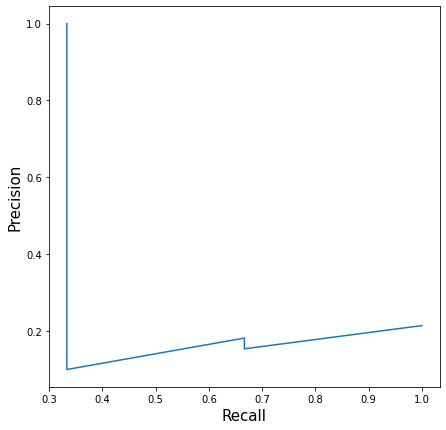

In [26]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [27]:
def f1(y_true, y_pred):
  """
  F1スコアを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: F1スコア
  """
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)

  score = 2 * p * r / (p + r)

  return score

In [28]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [29]:
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [30]:
f1(y_true, y_pred)

0.5714285714285715

In [31]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [32]:
def tpr(y_true, y_pred):
  """
  TPRスコアを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: TPR
  """
  return recall(y_true, y_pred)

In [33]:
def fpr(y_true, y_pred):
  """
  FPRスコアを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: FPR
  """
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)

In [34]:
# TPRとFPRの値を格納するリスト
tpr_list = []
fpr_list = []

# 正解
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# 陽性の予測確率
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# 閾値
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# それぞれの閾値についてのループ
for thresh in thresholds:
  # 閾値に基づき予測確率を0か1に変換
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # TPRを計算
  temp_tpr = tpr(y_true, temp_pred)
  # FPRを計算
  temp_fpr = fpr(y_true, temp_pred)
  # TPRとFPRをリストに格納
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

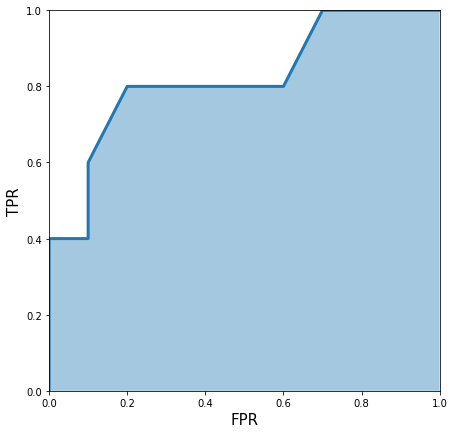

In [35]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [36]:
from sklearn import metrics

In [37]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

In [38]:
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

In [39]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [40]:
# 真陽性と偽陽性の値を格納するリスト
tp_list = []
fp_list = []

# 正解
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# 陽性の予測確率
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# 閾値
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# それぞれの閾値についてのループ
for thresh in thresholds:
  # 閾値に基づき予測確率を0か1に変換
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # TPRを計算
  temp_tp = true_positive(y_true, temp_pred)
  # FPRを計算
  temp_fp = false_positive(y_true, temp_pred)
  # 真陽性と偽陽性をリストに格納
  tp_list.append(temp_tp)
  fp_list.append(temp_fp)

In [41]:
import numpy as np

def log_loss(y_true, y_proba):
  """
  Log lossを計算する関数
  :param y_true: 正解のリスト
  :param y_proba: 陽性の予測確率のリスト
  :return すべてのサンプルに対するLog loss
  """
  # epsilonの定義
  # 予測確率の「クリッピング処理」に利用
  epsilon = 1e-15
  # 個々のサンプルに対するLog lossを格納するリスト
  loss = []
  # それぞれのサンプルについての ループ
  for yt, yp in zip(y_true, y_proba):
    # 予測確率を調整する「クリッピング処理」
    # 0はepsilonに、1は1-epsilonに変換
    # 理由は演習問題
    yp = np.clip(yp, epsilon, 1 - epsilon)
    # Log lossの計算
    temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    # リストに格納
    loss.append(temp_loss)
  # 平均値を返す
  return np.mean(loss)

In [42]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

In [43]:
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

In [44]:
log_loss(y_true, y_proba)

0.49882711861432294

In [45]:
from sklearn import metrics

In [46]:
metrics.log_loss(y_true, y_proba)

0.49882711861432294

In [47]:
import numpy as np

def macro_precision(y_ture, y_pred):
  """
  Macro averaged precisionを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return Macro averaged precision
  """

  # 目的変数の重複していない値の数を調べることで、クラス数を取得
  num_classes = len(np.unique(y_true))

  # 初期化
  precision = 0

  # それぞれのクラスについてのループ
  for class_ in range(num_classes):

    # 各ループで対象としているクラスを1、それ以外を0に変換
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # 真陽性を計算
    tp = true_positive(temp_true, temp_pred)
    
    # 偽陽性を計算
    fp = false_positive(temp_true, temp_pred)

    # 適合率を計算
    temp_precision = tp / (tp + fp)

    # 適合率を足し合わせる
    precision += temp_precision
  
  # 平均の適合率を返す
  precision /= num_classes
  return precision

In [48]:
import numpy as np

def micro_precision(y_ture, y_pred):
  """
  Micro averaged precisionを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return Micro averaged precision
  """

  # 目的変数の重複していない値の数を調べることで、クラス数を取得
  num_classes = len(np.unique(y_true))

  # 初期化
  tp = 0
  fp = 0

  # それぞれのクラスについてのループ
  for class_ in range(num_classes):

    # 各ループで対象としているクラスを1、それ以外を0に変換
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # 真陽性を計算し、足し合わせる
    tp += true_positive(temp_true, temp_pred)
    
    # 偽陽性を計算し、足し合わせる
    fp += false_positive(temp_true, temp_pred)

  # 適合率を返す
  precision = tp / (tp + fp)
  return precision

In [49]:
from collections import Counter
import numpy as np

def weighted_precision(y_ture, y_pred):
  """
  Weighted precisionを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return Weighted precision
  """

  # 目的変数の重複していない値の数を調べることで、クラス数を取得
  num_classes = len(np.unique(y_true))

  # クラスごとのサンプル数の辞書を作成
  # 次のような辞書が得られる
  # {0: 20, 1: 15, 2: 21}
  class_counts = Counter(y_true)

  # 初期化
  precision = 0

  # それぞれのクラスについてのループ
  for class_ in range(num_classes):

    # 各ループで対象としているクラスを1、それ以外を0に変換
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # 真陽性と偽陽性を計算
    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)

    # 適合率を計算
    temp_precision = tp / (tp + fp)

    # 適合率に重みを掛け合わせる
    weighted_precision = class_counts[class_] * temp_precision

    # 重み付きの適合率を足し合わせる
    precision += weighted_precision

  # 全サンプル数で割ることで、Weighted precisionを返す
  overall_precision = precision / len(y_ture)
  return overall_precision

In [50]:
from sklearn import metrics

In [51]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

In [52]:
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [53]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [54]:
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

In [55]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [56]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [57]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [58]:
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

In [59]:
from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
  """
  F1スコアを計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return F1スコア
  """
  # 目的変数の重複していない値の数を調べることで、クラス数を取得
  num_classes = len(np.unique(y_true))

  # クラスごとのサンプル数の辞書を作成
  # 次のような辞書が得られる:
  # {0: 20, 1:15, 2:21}
  class_counts = Counter(y_true)

  # 初期化
  f1 = 0

  # それぞれのクラスについてのループ
  for class_ in range(num_classes):
    # 各ループで対象としているクラスを1、それ以外を0に変換
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # 適合率と再現率を計算
    p = precision(temp_true, temp_pred)
    r = recall(temp_true, temp_pred)

    # F1スコアを計算
    if p + r != 0:
      temp_f1 = 2 * p * r / (p + r)
    else:
      temp_f1 = 0

    # F1スコアに重みをかけ合わせる
    weighted_f1 = class_counts[class_] * temp_f1

    # 重み付きのF1スコアを足し合わせる
    f1 += weighted_f1

  overall_f1 = f1 / len(y_true)
  return overall_f1

In [60]:
from sklearn import metrics

In [61]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

In [62]:
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [63]:
weighted_f1(y_true, y_pred)

0.41269841269841273

In [64]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

Text(0.5, 48.5, 'Predicted Labels')

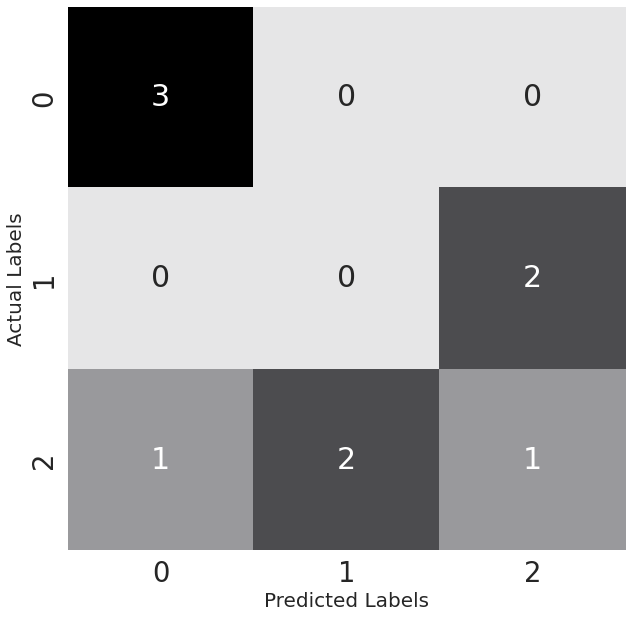

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# 正解
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

# 予測値
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# クラスの初期化
cm = metrics.confusion_matrix(y_true, y_pred)

# matplotlibのseabornによる可視化
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

In [66]:
def pk(y_true, y_pred, k):
  """
  単体のサンプルについてPrecision at kを計算する関数
  :param y_true: 正解クラスのリスト
  :param y_pred: 予測クラスのリスト
  :param k: kの値
  :return : Precision at k
  """
  # kが0の場合は0を返す
  if k == 0:
    return 0
  # 予測クラスのリストのうち、上位k個のみを利用
  y_pred = y_pred[:k]
  # 予測クラスをsetに変換して重複を排除
  pred_set = set(y_pred)
  # 正解クラスをsetに変換して重複を排除
  true_set = set(y_true)
  # 共通しているクラス数を計算
  common_values = pred_set.intersection(true_set)
  # kで割った値を返す
  return len(common_values) / len(y_pred[:k])

In [67]:
def apk(y_true, y_pred, k):
  """
  単体のサンプルについてAverage precision at kを計算する関数
  :param y_true: 正解クラスのリスト
  :param y_pred: 予測クラスのリスト
  :param k: kの値
  :return : Average precision at k
  """
  # リストの初期化
  pk_values = []
  # 1からk+1までのkについてのループ
  for i in range(1, k+1):
    # p@iを計算してリストに格納
    pk_values.append(pk(y_true, y_pred, i))

  # リストが空の場合、0を返す
  if len(pk_values) == 0:
    return 0
  # リストの平均を返す
  return sum(pk_values) / len(pk_values)

In [68]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

In [69]:
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

In [70]:
for i in range(len(y_true)):
  for j in range(1, 4):
    print(
        f"""
        y_true={y_true[i]},
        y_pred={y_pred[i]},
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """
    )


        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@1=0.0
        

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@2=0.25
        

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@3=0.38888888888888884
        

        y_true=[0, 2],
        y_pred=[1],
        AP@1=0.0
        

        y_true=[0, 2],
        y_pred=[1],
        AP@2=0.0
        

        y_true=[0, 2],
        y_pred=[1],
        AP@3=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@1=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@2=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@3=0.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@1=1.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@2=1.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@3=0.8888888888888888
        

        y_true=[1, 0],
        y_pred=[0, 1, 2],
        AP@1=1.

In [71]:
def mapk(y_true, y_pred, k):
  """
  Mean average precision at k を計算する関数
  :param y_true: 正解クラスのリスト
  :param y_pred: 予測クラスのリスト
  :param k: kの値
  :return: Mean average precision at k
  """
  # リストの初期化
  apk_values = []
  # それぞれのサンプルについてのループ
  for i in range(len(y_true)):
    # apkを計算してリストに格納
    apk_values.append(
        apk(y_true[i], y_pred[i], k=k)
    )
  # リストの平均を返す
  return sum(apk_values) / len(apk_values)

In [72]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

In [73]:
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

In [74]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [75]:
mapk(y_true, y_pred, k=2)

0.375

In [76]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [77]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

In [78]:
import numpy as np

def apk(actual, predicted, k=10):
  """
  Average precision at k を計算する関数
  Parameters
  ----------
  actual  : list
            正解クラスのリスト(順序に意味なし)
  predicted  : list
            予測クラスのリスト(順序に意味あり)
  k : int, 任意
            kの値
  Returns
  -------
  score : double
            Average precision at k
  """
  if len(predicted)>k:
    predicted = predicted[:k]
  
  score = 0.0
  num_hits = 0.0

  for i, p in enumerate(predicted):
    if p in actual and p not in predicted[:i]:
      num_hits += 1.0
      score += num_hits / (i+1.0)
  if not actual:
    return 0.0

  return score / min(len(actual), k)  

In [79]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
  """
  平均絶対誤差を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 平均絶対誤差
  """
  # 初期化
  error = 0
  # それぞれのサンプルについてのループ
  for yt, yp in zip(y_true, y_pred):
    # 絶対誤差を計算し、足し合わせる
    error += np.abs(yt - yp)
  # 平均を返す
  return error / len(y_true)

In [80]:
def mean_squared_error(y_true, y_pred):
  """
  平均二乗誤差を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 平均二乗誤差
  """
  # 初期化
  error = 0
  # それぞれのサンプルについてのループ
  for yt, yp in zip(y_true, y_pred):
    # 二乗誤差を計算し、足し合わせる
    error += (yt - yp) ** 2
  # 平均を返す
  return error / len(y_true)

In [81]:
import numpy as np

def mean_squared_log_error(y_true, y_pred):
  """
  平均二乗対数誤差を計算する関数
  :param y_true: 正解のリスト
  :param y_pred: 予測値のリスト
  :return: 平均二乗対数誤差
  """
  # 初期化
  error = 0
  # それぞれのサンプルについてのループ
  for yt, yp in zip(y_true, y_pred):
    # 二乗対数誤差を計算し、足し合わせる
    error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
  # 平均を返す
  return error / len(y_true)